In [16]:
source("Main.R")
"%ni%" = Negate( "%in%" )

In [2]:
#coefs <- read.csv("./../DATA/AllRegResults.csv")

In [3]:
# k = reshape(coefs[,c("guides", "coef", "respGene")], 
#             idvar = "guides", 
#             timevar = "respGene", 
#             direction = "wide")
# write.csv(k, "Coefs.csv", quote=FALSE, row.names=FALSE)


In [4]:
# l = reshape(coefs[,c("guides", "pval", "respGene")], 
#             idvar = "guides", 
#             timevar = "respGene", 
#             direction = "wide")
# write.csv(l, "Pvals.csv", quote=FALSE, row.names=FALSE)

In [17]:
KO_states <- read.csv("./../DATA/KO_state_perc.csv")
rownames(KO_states) = KO_states$condition
KO_states$condition = NULL
KO_states = KO_states[rownames(KO_states) != 'Unperturbed',]
# write.csv(KO_states[order(KO_states$cycling, 
#                           KO_states$terminal.exhausted, 
#                           KO_states$effector,
#                           KO_states$progenitor, 
#                           KO_states$other),], "./../DATA/KO_state_perc.csv", quote=FALSE, row.names=FALSE)
          

In [21]:
M = cor(t(KO_states), method="pearson")

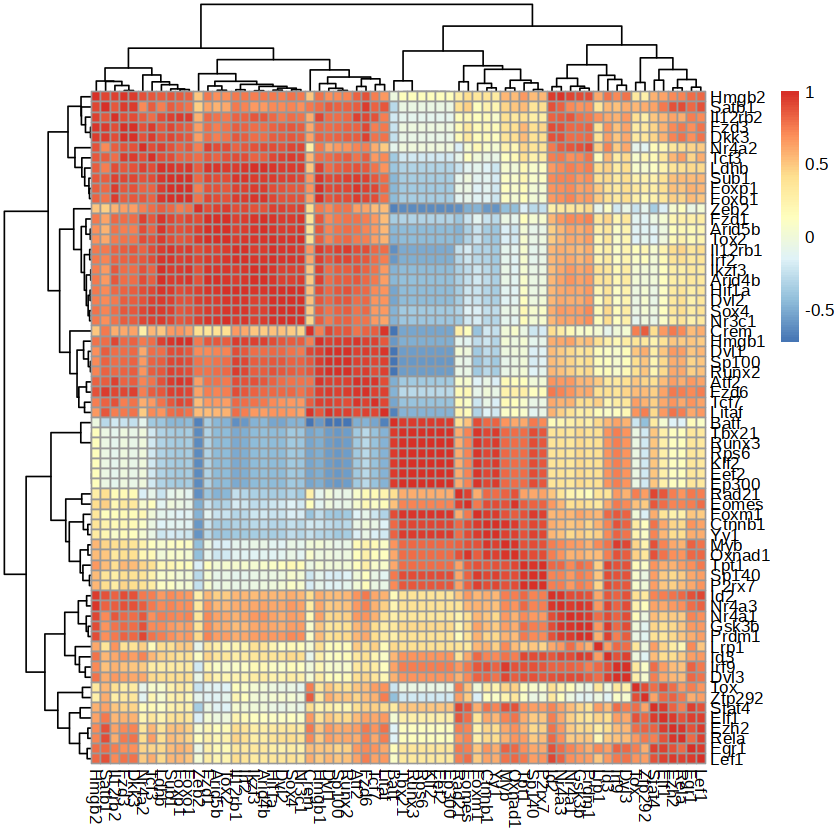

In [22]:
pheatmap(M)

In [6]:
l <- read.csv("./../DATA/Coefs.csv")
rownames(l) = l$guides
l$guides = NULL
colnames(l) = sapply(colnames(l), function(x){strsplit(x,"coef.")[[1]][2]})

k <- read.csv("./../DATA/Pvals.csv")
rownames(k) = k$guides
k$guides = NULL
colnames(k) = sapply(colnames(k), function(x){strsplit(x,"pval.")[[1]][2]})

#l[k > 0.1] = 0

In [7]:
l = l[rownames(l) %ni% c("cycling", "effector", "other", "exhausted"), ]
l = l[rownames(KO_states),]
discardedRows = rownames(l)[which(rownames(l) %ni% colnames(l))]
l = l[rownames(l) %ni% discardedRows,]
l = t(l[,rownames(l)])

In [8]:
KO_states = KO_states[rownames(l),]

In [9]:
# M = cor(t(l), method='pearson', use="complete.obs")
# diag(M) = NA
# options(repr.plot.width=10, repr.plot.height=10)
# pheatmap(M)

In [10]:
# M2 = cor(t(KO_states),  method='pearson')
# options(repr.plot.width=10, repr.plot.height=10)
# kk = pheatmap(M2, clustering_method = "ward.D")

In [11]:
# deneme= colnames(M2)[kk$tree_col$order]
# deneme = deneme[deneme != 'Unperturbed']
# pheatmap(M[deneme, deneme], cluster_rows = FALSE, cluster_cols = FALSE)


In [12]:
Y = KO_states

In [13]:
X = l

In [14]:
write.csv(Y, "./../DATA/Y_sorted.csv")

In [15]:
write.csv(X, "./../DATA/X_sorted.csv")